# Load the libraries

In [38]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Don't forget to turn on plotting display in the notebook.
%matplotlib inline 

# Load the data

In [39]:
boston = datasets.load_boston()

In [40]:
boston.keys()

['data', 'feature_names', 'DESCR', 'target']

In [41]:
boston.keys()

['data', 'feature_names', 'DESCR', 'target']

In [42]:
df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
df['target'] = boston['target']

In [43]:
df.sample(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
231,0.46296,0.0,6.20,0.0,0.504,7.412,76.9,3.6715,8.0,307.0,17.4,376.14,5.25,31.7
10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5.0,311.0,15.2,392.52,20.45,15.0
342,0.02498,0.0,1.89,0.0,0.518,6.540,59.7,6.2669,1.0,422.0,15.9,389.96,8.65,16.5
339,0.05497,0.0,5.19,0.0,0.515,5.985,45.4,4.8122,5.0,224.0,20.2,396.90,9.74,19.0
255,0.03548,80.0,3.64,0.0,0.392,5.876,19.1,9.2203,1.0,315.0,16.4,395.18,9.25,20.9
283,0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16,50.0
24,0.75026,0.0,8.14,0.0,0.538,5.924,94.1,4.3996,4.0,307.0,21.0,394.33,16.30,15.6
372,8.26725,0.0,18.10,1.0,0.668,5.875,89.6,1.1296,24.0,666.0,20.2,347.88,8.88,50.0
114,0.14231,0.0,10.01,0.0,0.547,6.254,84.2,2.2565,6.0,432.0,17.8,388.74,10.45,18.5
143,4.09740,0.0,19.58,0.0,0.871,5.468,100.0,1.4118,5.0,403.0,14.7,396.90,26.42,15.6


# Create X (matrix) and y (vector)

In [44]:
features = boston['feature_names']
X = df[features]
y = df['target']

In [45]:
X.shape

(506, 13)

In [46]:
y.shape

(506,)

# NOTE: In ML we always use a training set (to build the model) and a test set (to evaluate the results).  

# Basic model with sklearn

### Create test and training set

In [47]:
len(df)

506

In [48]:
# Split the original dataframe into train and test
df_train = df.sample(400).copy()
df_test = df[~df.index.isin(df_train.index)].copy()

In [66]:
df_train.shape

(400, 14)

In [67]:
df_test.shape

(106, 14)

In [49]:
# Create X_test, y_test, X_train, y_train

X_test = df_test[features]
y_test = df_test['target']

X_train = df_train[features]
y_train = df_train['target']

### Fit/train the model

In [50]:
lr = linear_model.LinearRegression()

In [51]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Print the coefficients

In [52]:
lr.coef_

array([-1.26749088e-01,  5.62757171e-02,  6.55372652e-02,  3.55012556e+00,
       -1.85672077e+01,  3.38053792e+00,  1.01226898e-03, -1.59346403e+00,
        2.90304615e-01, -1.16752464e-02, -9.44816940e-01,  9.39501937e-03,
       -5.65862600e-01])

In [53]:
 for f, coeff in zip(features,lr.coef_):
        print(f,coeff)

('CRIM', -0.12674908837675924)
('ZN', 0.0562757170578127)
('INDUS', 0.06553726515444136)
('CHAS', 3.550125558925963)
('NOX', -18.567207716029177)
('RM', 3.380537919583929)
('AGE', 0.0010122689828546583)
('DIS', -1.5934640315711392)
('RAD', 0.29030461543063446)
('TAX', -0.011675246353599709)
('PTRATIO', -0.9448169395039427)
('B', 0.009395019374972825)
('LSTAT', -0.5658626000211441)


In [54]:
lr.intercept_

39.478526352865885

In [ ]:
lr.fit(other data)

### Calculate the predictions

In [55]:
y_test_pred = lr.predict(X_test)

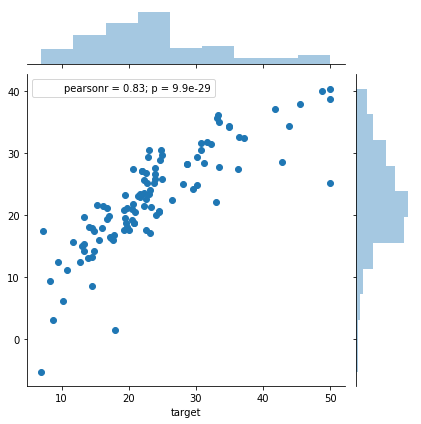

In [56]:
sns.jointplot(y_test, y_test_pred)

In [57]:
# plt.scatter(y_test, 
#               y_test_pred)
# plt.xlim(0,60)
# plt.ylim(0,60)
# plt.plot([0,60],
#          [0,60])
# plt.title('Real vs. Predicted values')
# plt.xlabel('real values')
# plt.ylabel('predicted values')

### Calculate the metrics

In [58]:
r2_score(y_test,y_test_pred)

0.689752389289875

In [59]:
mean_squared_error(y_test,y_test_pred)

28.188426387059614

#  
#  
#  Basic model with statsmodule

### Create the model

In [60]:
# NOTE: The variables are now parameters of the model

model = sm.OLS(y_train, X_train)

### Fit the model

In [61]:
# NOTE: the variables are not here!

model = model.fit() 

### Calculate the predictions

In [62]:
y_test_pred = model.predict(X_test)

### Plot the predictions

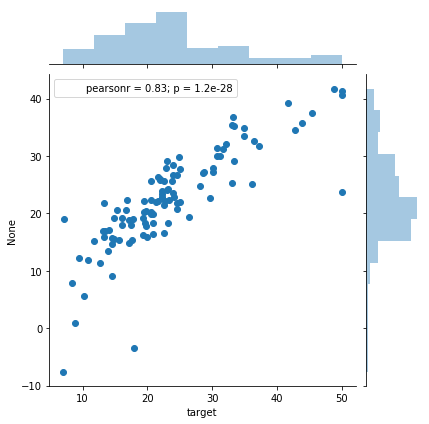

In [63]:
sns.jointplot(y_test, y_test_pred)

### Print the summary

In [64]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     712.1
Date:                Wed, 20 Jun 2018   Prob (F-statistic):          6.72e-261
Time:                        09:33:58   Log-Likelihood:                -1196.5
No. Observations:                 400   AIC:                             2419.
Df Residuals:                     387   BIC:                             2471.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1119      0.035     -3.206      0.001      -0.181      -0.043
ZN             0.0568      0.016      3.579      0.000       0.026       0.088
INDUS          0.0339      0.074      0.460      0.646      -0.111       0.179
CHAS           3.7198      1.058      3.517      0.000       1.640       5.799
NOX           -1.9352      3.843     -0.504      0.615      -9.491       5.621
RM             5.6547      0.349     16.221      0.000       4.969       6.340
AGE           -0.0085      0.015     -0.548      0.584      -0.039       0.022
DIS           -0.9923      0.226     -4.387      0.000      -1.437      -0.548
RAD            0.1532      0.072      2.138      0.033       0.012       0.294
TAX           -0.0083      0.004     -1.921      0.055      -0.017       0.000
PTRATIO       -0.3634      0.119     -3.054      0.002      -0.597      -0.129
B              0.0161      0.003      5.406      0.000       0.010       0.022
LSTAT         -0.4592      0.055     -8.390      0.000      -0.567      -0.352
==============================================================================
Omnibus:                      146.155   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              928.269
Skew:                           1.406   Prob(JB):                    2.69e-202
Kurtosis:                       9.913   Cond. No.                     8.89e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
model.params

CRIM      -0.111915
ZN         0.056758
INDUS      0.033910
CHAS       3.719830
NOX       -1.935161
RM         5.654679
AGE       -0.008463
DIS       -0.992268
RAD        0.153227
TAX       -0.008338
PTRATIO   -0.363379
B          0.016089
LSTAT     -0.459192
dtype: float64